In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,LinearRegression,LassoCV, RidgeCV, ElasticNetCV
from xgboost import XGBRegressor


from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor


from sklearn.ensemble import StackingRegressor

from scipy import stats
from scipy.stats import norm, skew



C:\Users\EngMA\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\EngMA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\EngMA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("final_dataframe.csv")

In [3]:
df['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1447    12.072547
1448    12.254868
1449    12.493133
1450    11.864469
1451    11.901590
Name: SalePrice, Length: 1452, dtype: float64

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 284 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    MSSubClass                 float64
 1    MSZoning                   float64
 2    LotFrontage                float64
 3    LotArea                    float64
 4    Street                     float64
 5    Alley                      float64
 6    LotShape                   float64
 7    LandSlope                  float64
 8    OverallQual                int64  
 9    OverallCond                float64
 10   YearBuilt                  int64  
 11   YearRemodAdd               int64  
 12   MasVnrArea                 float64
 13   ExterQual                  float64
 14   ExterCond                  float64
 15   BsmtQual                   float64
 16   BsmtCond                   float64
 17   BsmtExposure               float64
 18   BsmtFinType1               int64  
 19   BsmtFinSF1               

In [16]:
X = df.drop("SalePrice", axis=1)
# X = df[important_index]

# y = np.log1p(df["SalePrice"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




X_train=X_train[['N_coded_mean', 'bath_score', 'GarageCars', 'KitchenQual', '1stFlrSF', 
 'overall_score', 'room_size', 'heat_fireplace_fQc', 'Foundation_PConc', 
 'MSSubClass', 'BsmtQual', 'YrGroup', 'MSZoning', 'LotArea', 'BsmtExposure', 
 'CentralAir', 'BsmtFinType1', 'HalfBath', 'MasVnrType_Stone', 'SaleType']]

X_test=X_test[['N_coded_mean', 'bath_score', 'GarageCars', 'KitchenQual', '1stFlrSF', 
 'overall_score', 'room_size', 'heat_fireplace_fQc', 'Foundation_PConc', 
 'MSSubClass', 'BsmtQual', 'YrGroup', 'MSZoning', 'LotArea', 'BsmtExposure', 
 'CentralAir', 'BsmtFinType1', 'HalfBath', 'MasVnrType_Stone', 'SaleType']]

cols=['N_coded_mean', 'bath_score', 'GarageCars', 'KitchenQual', '1stFlrSF', 
 'overall_score', 'room_size', 'heat_fireplace_fQc', 'Foundation_PConc', 
 'MSSubClass', 'BsmtQual', 'YrGroup', 'MSZoning', 'LotArea', 'BsmtExposure', 
 'CentralAir', 'BsmtFinType1', 'HalfBath', 'MasVnrType_Stone', 'SaleType']


ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,years_model_51,years_model_52,years_model_53,years_model_54,years_model_55,years_model_56,years_model_57,years_model_58,years_model_59,years_model_60
0,2.708050,1.609438,4.189655,9.042040,0.693147,1.098612,1.386294,1.098612,7,1.791759,...,0,0,0,0,0,0,0,0,0,0
1,2.484907,1.609438,4.394449,9.169623,0.693147,1.098612,1.386294,1.098612,6,2.197225,...,0,0,0,0,0,0,0,0,0,0
2,2.708050,1.609438,4.234107,9.328212,0.693147,1.098612,1.098612,1.098612,7,1.791759,...,0,0,0,0,0,0,0,0,0,0
3,2.397895,1.609438,4.110874,9.164401,0.693147,1.098612,1.098612,1.098612,7,1.791759,...,0,0,0,0,0,0,0,0,0,0
4,2.708050,1.609438,4.442651,9.565284,0.693147,1.098612,1.098612,1.098612,8,1.791759,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2.708050,1.609438,4.143135,8.976894,0.693147,1.098612,1.386294,1.098612,6,1.791759,...,0,0,0,0,0,0,0,0,0,0
1448,2.484907,1.609438,4.454347,9.486152,0.693147,1.098612,1.386294,1.098612,6,1.945910,...,0,0,0,0,0,0,0,0,0,0
1449,2.397895,1.609438,4.204693,9.109746,0.693147,1.098612,1.386294,1.098612,7,2.302585,...,0,0,0,0,0,0,0,0,0,0
1450,2.484907,1.609438,4.234107,9.181735,0.693147,1.098612,1.386294,1.098612,5,1.945910,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train

,N_coded_mean,bath_score,GarageCars,KitchenQual,1stFlrSF,overall_score,room_size,heat_fireplace_fQc,Foundation_PConc,MSSubClass,BsmtQual,YrGroup,MSZoning,LotArea,BsmtExposure,CentralAir,BsmtFinType1,HalfBath,MasVnrType_Stone,SaleType
1262,11.881616,3.0,1,2,6.774224,25,5.387766,0.000000,0,1.945910,1.386294,1,1.609438,9.336532,0.693147,0.693147,4,0.693147,0,1.609438
979,11.768511,2.0,1,3,6.909753,48,5.793014,0.000000,0,1.945910,1.386294,2,1.098612,8.577535,0.693147,0.693147,1,0.000000,0,1.609438
792,11.881616,2.0,1,2,6.651572,25,5.269146,0.000000,0,2.484907,1.386294,1,1.609438,8.946114,0.693147,0.693147,4,0.000000,0,1.609438
1433,12.194968,2.5,2,3,6.744059,30,5.647800,2.564949,1,2.639057,1.609438,0,1.098612,8.395477,1.386294,0.693147,6,0.000000,0,1.609438
374,12.194968,2.0,2,2,6.818924,25,5.213848,0.000000,1,2.079442,1.609438,0,1.609438,9.087834,1.386294,0.693147,6,0.000000,0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11.881616,2.0,1,2,7.034388,35,5.247024,0.000000,0,2.484907,1.386294,1,1.609438,8.853808,0.693147,0.693147,3,0.000000,0,1.609438
1130,11.836051,2.0,0,2,6.660575,40,5.141664,0.000000,0,1.945910,1.386294,2,1.609438,8.755107,0.693147,0.000000,1,0.000000,0,1.609438
1294,12.685976,5.5,3,3,7.093405,40,5.758113,2.564949,1,2.708050,1.609438,0,1.609438,9.222368,0.693147,0.693147,6,0.693147,0,1.609438
860,11.881616,2.5,2,2,6.910751,30,5.305293,0.000000,0,2.484907,1.386294,3,1.609438,9.076923,0.693147,0.693147,4,0.000000,0,1.609438


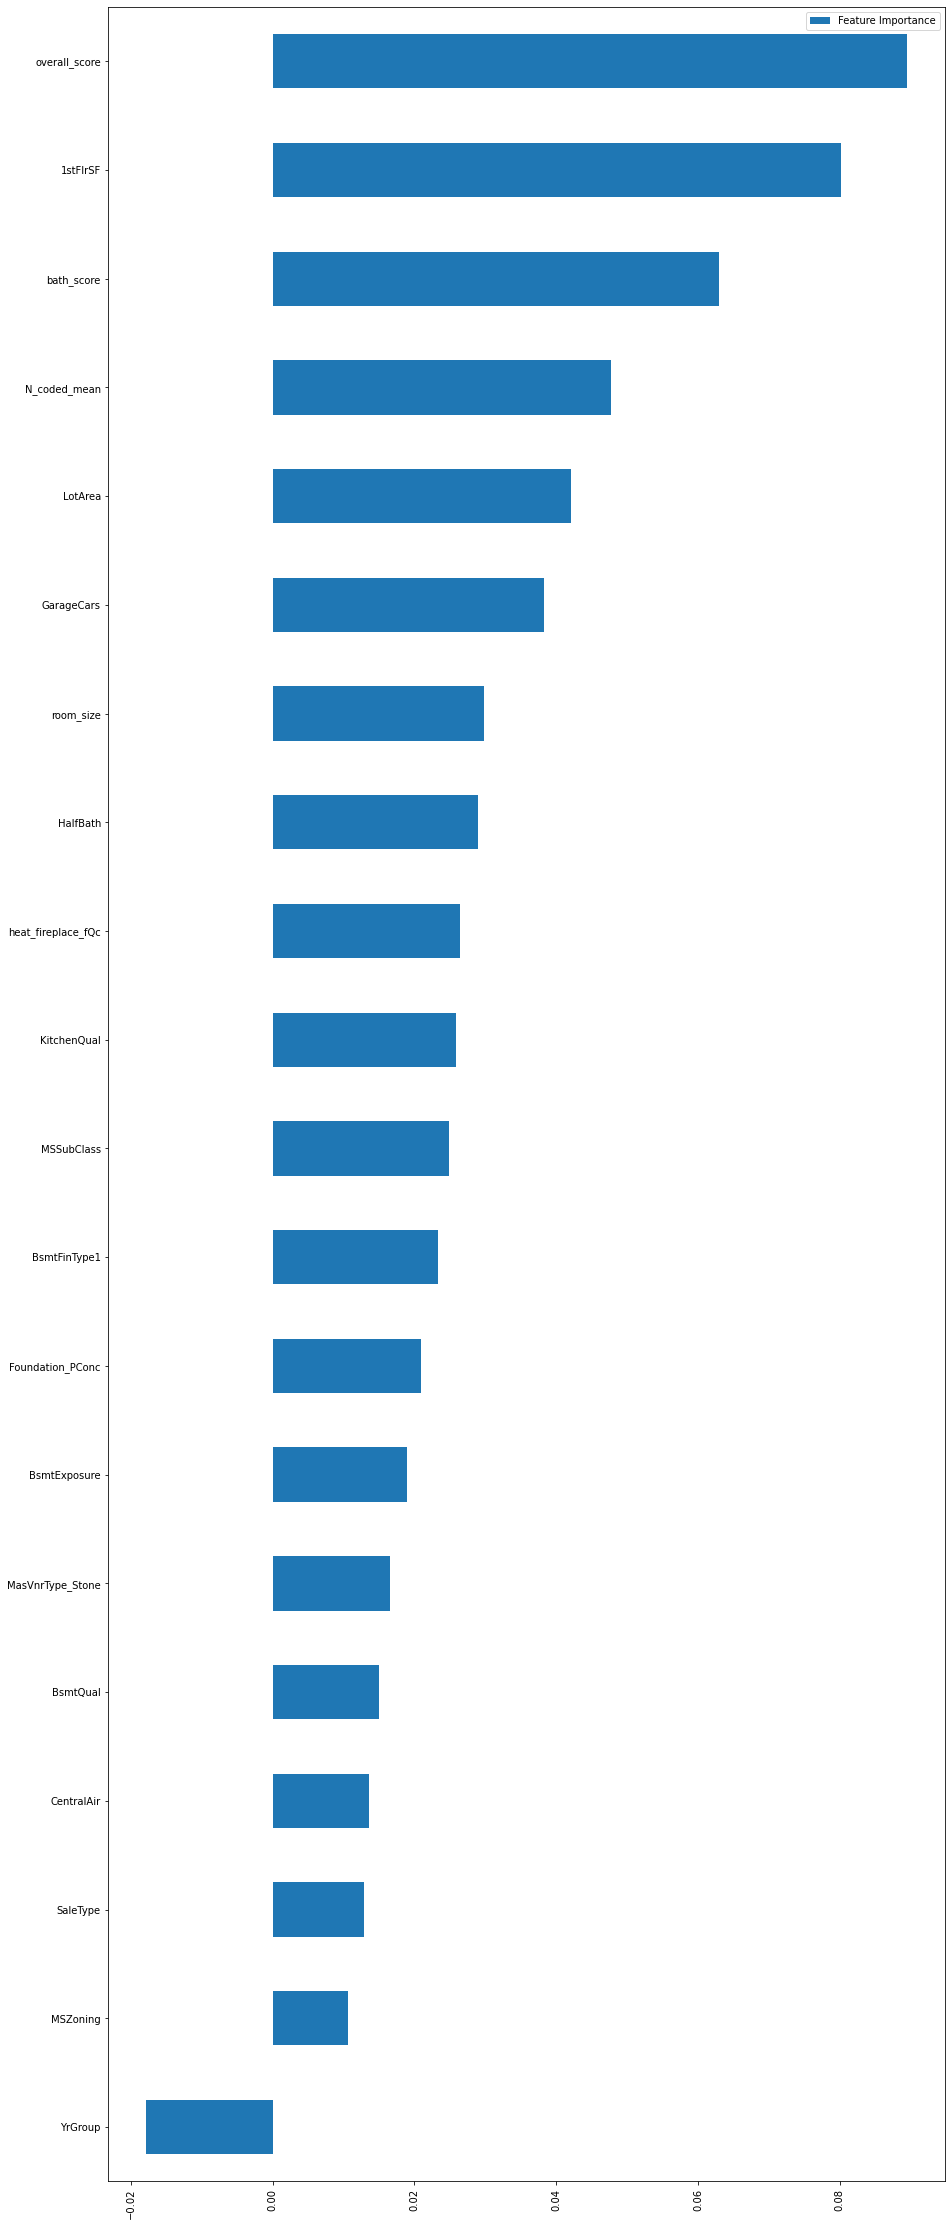

In [18]:
df.shape
lasso=Lasso(alpha=0.001)
lasso.fit(scaled_X_train,y_train)


FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=cols)
FI_lasso.sort_values("Feature Importance",ascending=False)

FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,40))
plt.xticks(rotation=90)
plt.show()

In [20]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=20)

scaled_X_train=pca.fit_transform(scaled_X_train)
scaled_X_test=pca.transform(scaled_X_test)

In [21]:
scaled_X_train

array([[ 1.75059978e+00,  2.29173671e-02,  8.64580906e-01, ...,
         2.69463904e-02,  2.14449808e-02, -5.99466035e-01],
       [ 1.75696164e+00, -4.23065811e-01, -2.09533515e-01, ...,
        -4.05483718e-01,  4.19545611e-02,  3.09626854e-01],
       [ 2.41538961e+00, -2.33062246e-01, -2.84669351e-01, ...,
         3.52532283e-03, -5.72747507e-01, -1.06971958e-01],
       ...,
       [-3.81833406e+00, -3.03293693e-01,  1.44905223e+00, ...,
        -8.23891940e-01, -1.09836565e-01, -9.66772704e-02],
       [ 1.89610031e+00,  9.63294686e-01, -2.88573330e-01, ...,
         3.24103061e-03, -3.32948600e-02,  3.87365059e-01],
       [-2.33057937e+00, -4.39531832e-01,  1.08412996e+00, ...,
         4.72790928e-01,  4.28087109e-01, -2.27810285e-02]])

In [22]:
def Multicollinear_Features():
    corr = df.corr().abs()
    features = []
    correlations = []
    for idx, correlation in corr['SalePrice'].T.iteritems():
        if correlation >= .3 and idx != 'SalePrice':
            features.append(idx)
            correlations.append(correlation)
    corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features})
    Multicollinear_Features = []
    def check_multicollinearity(feature):
        for idx, correlation in corr[feature].T.iteritems():
            if correlation >= .8 and idx != feature and corr['SalePrice'].loc[feature] >= corr['SalePrice'].loc[idx]:
                Multicollinear_Features.append({'Correlations':correlation,'Features':feature,'idx': idx})

    for feature in corr:
        check_multicollinearity(feature)
    if len(Multicollinear_Features) > 0:
        MC_df = pd.DataFrame(Multicollinear_Features)
    else:
        MC_df = pd.DataFrame(columns=['Correlations', 'Features','idx'])
    print('Multicollinear Features')
    MC_df.sort_values(by='Correlations',ascending=False,inplace=True)
    MC_df.reset_index(drop=True,inplace=True)
    display(MC_df)


    corr_price_df.sort_values(by='Correlations',ascending=False,inplace=True)
    corr_price_df.reset_index(drop=True,inplace=True)
    print('Correlations with Price')
    corr_price_df = corr_price_df.loc[~corr_price_df['Features'].isin(MC_df['idx'].to_list())]
    display(corr_price_df)
    return(MC_df,corr_price_df)

MC_df,corr_price_df=Multicollinear_Features()

Multicollinear Features


,Correlations,Features,idx
0,1.000000,pool_score,PoolQC
1,1.000000,Exterior2nd_CBlock,Exterior1st_CBlock
2,1.000000,Exterior1st_CBlock,Exterior2nd_CBlock
3,1.000000,PoolQC,pool_score
4,0.999796,pool,PoolArea
5,0.998778,N_coded_mean,Neighborhood_encoded
6,0.984033,GarageQual,GarageCond
7,0.977438,Exterior2nd_VinylSd,Exterior1st_VinylSd
8,0.973750,Exterior1st_CemntBd,Exterior2nd_CmentBd
9,0.973039,Exterior1st_MetalSd,Exterior2nd_MetalSd


Correlations with Price


,Correlations,Features
2,0.756236,N_coded_mean
5,0.687285,bath_score
6,0.681593,GarageCars
7,0.680300,ExterQual
8,0.668678,KitchenQual
10,0.613493,1stFlrSF
11,0.606306,overall_score
12,0.604789,GarageFinish
13,0.600012,YearBuilt
16,0.580755,room_size


In [23]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    removed = []
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included) - set(removed))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature =model.pvalues.idxmax()
            included.remove(worst_feature)
            removed.append(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(df[corr_price_df['Features'].to_list()], df['SalePrice'], verbose=True)
print('resulting features:')
#result = result[:-1]
result =corr_price_df.loc[corr_price_df['Features'].isin(result)]['Features'].to_list()
print(result)

C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  N_coded_mean                   with p-value 2.07917e-269
Add  overall_score                  with p-value 9.56863e-104
Add  1stFlrSF                       with p-value 2.44122e-97


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bath_score                     with p-value 1.64714e-92
Add  GarageCars                     with p-value 1.18105e-30


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  BsmtQual                       with p-value 3.4977e-22
Add  MSSubClass                     with p-value 7.93235e-22


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  heat_fireplace_fQc             with p-value 3.94029e-17
Add  LotArea                        with p-value 2.69524e-14


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  KitchenQual                    with p-value 2.60898e-16
Add  HalfBath                       with p-value 1.56618e-09


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  BsmtFinType1                   with p-value 3.90709e-10
Add  Foundation_PConc               with p-value 1.61049e-10


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  room_size                      with p-value 3.54935e-07
Add  MSZoning                       with p-value 1.52696e-07


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  MasVnrType_Stone               with p-value 9.81307e-07
Add  BsmtExposure                   with p-value 2.95276e-05


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  CentralAir                     with p-value 0.000104087
Add  SaleType                       with p-value 7.04345e-05


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  YrGroup                        with p-value 0.000166067
resulting features:
['N_coded_mean', 'bath_score', 'GarageCars', 'KitchenQual', '1stFlrSF', 'overall_score', 'room_size', 'heat_fireplace_fQc', 'Foundation_PConc', 'MSSubClass', 'BsmtQual', 'YrGroup', 'MSZoning', 'LotArea', 'BsmtExposure', 'CentralAir', 'BsmtFinType1', 'HalfBath', 'MasVnrType_Stone', 'SaleType']


C:\Users\EngMA\AppData\Local\Temp\ipykernel_29076\390521067.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [24]:
scaled_X_train

array([[ 1.75059978e+00,  2.29173671e-02,  8.64580906e-01, ...,
         2.69463904e-02,  2.14449808e-02, -5.99466035e-01],
       [ 1.75696164e+00, -4.23065811e-01, -2.09533515e-01, ...,
        -4.05483718e-01,  4.19545611e-02,  3.09626854e-01],
       [ 2.41538961e+00, -2.33062246e-01, -2.84669351e-01, ...,
         3.52532283e-03, -5.72747507e-01, -1.06971958e-01],
       ...,
       [-3.81833406e+00, -3.03293693e-01,  1.44905223e+00, ...,
        -8.23891940e-01, -1.09836565e-01, -9.66772704e-02],
       [ 1.89610031e+00,  9.63294686e-01, -2.88573330e-01, ...,
         3.24103061e-03, -3.32948600e-02,  3.87365059e-01],
       [-2.33057937e+00, -4.39531832e-01,  1.08412996e+00, ...,
         4.72790928e-01,  4.28087109e-01, -2.27810285e-02]])

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



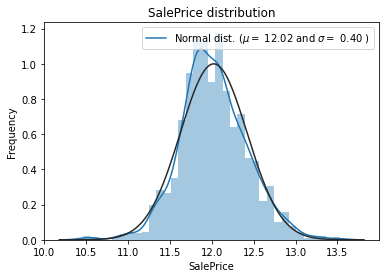

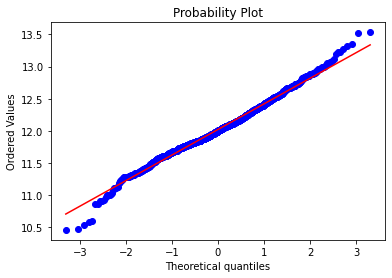

In [25]:


sns.distplot(y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

In [26]:
rfr = RandomForestRegressor()

rfr.fit(scaled_X_train, y_train)
y_pred0 = rfr.predict(scaled_X_train)
y_pred = rfr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.04902865044390966
Test RMSE: 0.12821295424102186


In [27]:
#All_new_Features_Engineer
# Train RMSE: 10288.67747112295
# Test RMSE: 22162.708476053114

#feature+AggSF+bath_score

# Train RMSE: 9832.674992896827
# Test RMSE: 25377.709301168707

#second 5
# Train RMSE: 10723.111244454583
# Test RMSE: 26168.006099629893


#first 5
# Train RMSE: 10389.099787077312
# Test RMSE: 26547.381106484325

#132 with new_features
# Train RMSE: 10284.494552381915
# Test RMSE: 26142.563753785016


# Features used =132 (the top important)
# Train RMSE: 10872.57567244795
# Test RMSE: 31327.169785464463

# Features used =252 (the top important)
# Train RMSE: 10968.0749225494
# Test RMSE: 31317.279333587183

# Features used =100 (the top important)
# Train RMSE: 10805.823016808501
# Test RMSE: 30911.613278398007

# Features used =50 (the top important)
# Train RMSE: 11240.72618642726
# Test RMSE: 31044.837560894928


# Features used =110 (the top important)
# Train RMSE: 11110.878848400223
# Test RMSE: 29879.21169545467



#New_Change to the features
# Train RMSE: 10421.514436464882
# Test RMSE: 26817.191323233357





In [28]:
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred0 = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.33262762602948587
Test RMSE: 0.3399780348051234


In [29]:
# Features used =132 (the top important)
# Train RMSE: 26900.977127642407
# Test RMSE: 34769.654663535606

# Features used =252 (the top important)
# Train RMSE: 23833.27467543582
# Test RMSE: 34678.98027124445

# Features used =100 (the top important)
# Train RMSE: 27901.775089800736
# Test RMSE: 33489.982852708585

# Features used =50 (the top important)
# Train RMSE: 32197.44009255128
# Test RMSE: 34766.98996229141


# Features used =110 (the top important)
# Train RMSE: 27724.634237145012
# Test RMSE: 34085.38022148854

In [30]:
gbr = GradientBoostingRegressor()

gbr.fit(scaled_X_train, y_train)
y_pred0 = gbr.predict(scaled_X_train)
y_pred = gbr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
log_test_rmse = (np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))))
print(gbr.score(scaled_X_test,y_test))
print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")



0.8998147212260973
Train RMSE: 0.08547542459085655
Test RMSE: 0.12468098947465167


In [31]:





#first 5
# Train RMSE: 13288.911665869116
# Test RMSE: 22365.814302431485


#new_feature with 132 used
# Train RMSE: 13259.850231318695
# Test RMSE: 22236.906192173377

# Features used =132 (the top important)
# Train RMSE: 13512.08241985413
# Test RMSE: 26769.53712099131

# Features used =252 (the top important)
# Train RMSE: 13553.762894080202
# Test RMSE: 27952.643952363356

# Features used =100 (the top important)
# Train RMSE: 13552.797778151087
# Test RMSE: 27042.012674974452

# Features used =50 (the top important)
# Train RMSE: 14221.953043867901
# Test RMSE: 27787.420929581058

# Features used =110 (the top important)
# Train RMSE: 13554.770504438837
# Test RMSE: 27781.769012262015


#new_feature
# Train RMSE: 13306.04951653029
# Test RMSE: 22458.126495254834




In [32]:
# testing= pd.DataFrame()
# testing["ytest"]=y_test
# testing["ypred"]=y_pred
# testing

In [33]:
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=7) 

xgb.fit(scaled_X_train, y_train)
y_pred0 = xgb.predict(scaled_X_train)
y_pred = xgb.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.03754213180374469
Test RMSE: 0.12584510184999467


In [34]:

#all_feature_Engineering
# Train RMSE: 3345.2521874835797
# Test RMSE: 20257.610299404685
    
    
# Features used =132 (the top important)
# Train RMSE: 4250.378115433559
# Test RMSE: 28229.364003549268

# Features used =252 (the top important)
# Train RMSE: 4130.241498553838
# Test RMSE: 28705.99171082086

# Features used =100 (the top important)
# Train RMSE: 4255.37150047599
# Test RMSE: 28366.830013347975

In [35]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred0 = lr.predict(X_train)
y_pred = lr.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.12678717501963058
Test RMSE: 0.1274092380478539


In [36]:
# Features used =132 (the top important)
# Train RMSE: 26900.74418849311
# Test RMSE: 34848.01954186513

# Features used =252 (the top important)
# Train RMSE: 26900.74418849311
# Test RMSE: 34848.01954186513

# Features used =100 (the top important)
# Train RMSE: 27901.630973713163
# Test RMSE: 33542.02163772606

In [37]:
# feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
# feat_importances.nlargest(30).plot(kind='barh')

In [38]:

# new_important_features= feat_importances.sort_values(ascending=False)

# # print(feat_importances.index)

# # print(new_important_features.index)


# important_index=[] 
# i=0

# for j in new_important_features.index:
#     important_index.append(j)
#     if i>130:
#         break
#     i+=1
    
# len(important_index)    
 

In [39]:
# # X = df.drop("SalePrice", axis=1)
# X = df[important_index]

# y = np.log1p(df["SalePrice"])
# # y = df["SalePrice"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ss = StandardScaler()
# scaled_X_train = ss.fit_transform(X_train)
# scaled_X_test = ss.transform(X_test)

## Parameter Tuning: Grid Search

In [40]:
# gbr_parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
#                   'subsample'    : [0.9, 0.5, 0.2, 0.1],
#                   'n_estimators' : [100,500,1000, 1500],
#                   'max_depth'    : [4,6,8,10]
#                  }


# grid_gbr = GridSearchCV(estimator= gbr, param_grid=gbr_parameters, cv=3, n_jobs=-1)

# grid_gbr.fit(scaled_X_train, y_train)

# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid_gbr.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid_gbr.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid_gbr.best_params_)

In [41]:
# best_gbr = GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=200,
#                           subsample=0.5)

# best_gbr.fit(scaled_X_train, y_train)
# y_pred0 = best_gbr.predict(scaled_X_train)
# y_pred = best_gbr.predict(scaled_X_test)

# train_rmse = np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_pred0)))
# test_rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

# print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

In [42]:
# np.expm1()

In [43]:
# Features used =132 (the top important)
# Train RMSE: 3269.8581991147457
# Test RMSE: 25249.814217985793

# Features used =252 (the top important)
# Train RMSE: 3613.6860461828014
# Test RMSE: 27421.66052895415

In [44]:
def gridsearch(reg, param_grid):
    
    cv = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5, # количество фолдов
    verbose=4, # сколько печатать сообщений
    n_jobs=-1) # насколько параллелельно считаем
    
    cv.fit(scaled_X_train, y_train)
    
    best_params = cv.best_params_
    best_params = str(best_params).replace(':', '=').replace('{', '').replace('}', '')    
    best_params = str(best_params).replace("'", '')
    print(best_params)
    return best_params

In [45]:
def MSE(model):
    model.fit(scaled_X_train, y_train)
    
    train_MSE = mean_squared_error(model.predict(scaled_X_train), y_train)**.5
    test_MSE = mean_squared_error(model.predict(scaled_X_test), y_test)**.5
  
    return  print("train MSE:", train_MSE), print("test MSE:", test_MSE)

In [46]:
def y_test_pred(model):
    model.fit(scaled_X_train, y_train)
    y_pred = np.exp(model.predict(scaled_X_test))
    return y_pred

In [47]:
gridsearch(LinearRegression(), {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1]})

Fitting 5 folds for each of 8 candidates, totalling 40 fits
copy_X= True, fit_intercept= True, n_jobs= -1, normalize= False


'copy_X= True, fit_intercept= True, n_jobs= -1, normalize= False'

In [48]:
lin_reg = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= -1, normalize= False)

In [49]:
MSE(lin_reg)

train MSE: 0.12678717501963052
test MSE: 0.12740923804785398


(None, None)

In [50]:
gridsearch(LassoCV(), {'n_alphas': [100, 150, 70, 50]})

Fitting 5 folds for each of 4 candidates, totalling 20 fits
n_alphas= 100


'n_alphas= 100'

In [51]:
lasso = LassoCV(n_alphas= 100)
MSE(lasso)

train MSE: 0.1268972008128215
test MSE: 0.12748826039660643


(None, None)

In [52]:
gridsearch(RidgeCV(), {'fit_intercept': [True, False],
                       'normalize': [True, False]})

Fitting 5 folds for each of 4 candidates, totalling 20 fits
fit_intercept= True, normalize= False


'fit_intercept= True, normalize= False'

In [53]:
ridge = RidgeCV(fit_intercept= True, normalize= False)
MSE(ridge)

train MSE: 0.1267926518133124
test MSE: 0.1273709739589041


(None, None)

In [54]:
gridsearch(ElasticNetCV(), {'l1_ratio': [.1, .5, .7, .9, .95, .99, 1],
                           'n_alphas': [100, 150, 70, 50],
                           'fit_intercept': [True, False],
                           'normalize': [True, False],
                           'max_iter': [100, 500, 150],
                           'random_state': [42]})

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
fit_intercept= True, l1_ratio= 0.9, max_iter= 100, n_alphas= 50, normalize= True, random_state= 42


'fit_intercept= True, l1_ratio= 0.9, max_iter= 100, n_alphas= 50, normalize= True, random_state= 42'

In [55]:
ElNetCV = ElasticNetCV(fit_intercept= True, l1_ratio= 0.1, max_iter= 100, n_alphas= 150, normalize= True, random_state= 42)
MSE(ElNetCV)

train MSE: 0.13271600002785305
test MSE: 0.13280415575789992


(None, None)

In [56]:
gridsearch(DecisionTreeRegressor(), {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': [0.5, 'sqrt', None]})

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
criterion= mae, max_depth= 5, max_features= None, min_samples_split= 10, splitter= best


'criterion= mae, max_depth= 5, max_features= None, min_samples_split= 10, splitter= best'

In [57]:
dt = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 20, max_features= 0.5, min_samples_split= 10, splitter= 'best')

MSE(dt)

train MSE: 0.06683632996657117
test MSE: 0.17555909257330304


(None, None)

In [58]:
rf = RandomForestRegressor (n_estimators = 1000, random_state = 42)

MSE(rf)

train MSE: 0.047966700042941256
test MSE: 0.12856422269186427


(None, None)

In [59]:
gbm = GradientBoostingRegressor(learning_rate=.12, n_estimators=50)
MSE(gbm)

train MSE: 0.0969247368441305
test MSE: 0.1261173284479874


(None, None)

In [60]:

l_gbm = LGBMRegressor(objective='regression')
MSE(l_gbm)

train MSE: 0.03731214486078056
test MSE: 0.12866579175911974


(None, None)

In [61]:
gridsearch(LGBMRegressor(), {'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                                'num_leaves': [31, 40, 27],
                                'learning_rate': [0.1, 0.2, 0.005, 0.09],
                                'class_weight ': ['balanced', None],
                                'n_estimators': [100, 150, 90], 
                                'objective' : ['regression']})

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: balanced
boosting_type= goss, class_weight = balanced, learning_rate= 0.1, n_estimators= 90, num_leaves= 40, objective= regression


C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.85082844e-02 -1.86049684e-02 -1.83060841e-02 -1.86245116e-02
 -1.86283897e-02 -1.83822513e-02 -1.84721357e-02 -1.85611460e-02
 -1.82413139e-02 -1.90172012e-02 -1.95449350e-02 -1.91168121e-02
 -1.90725658e-02 -1.96054049e-02 -1.92323881e-02 -1.89867191e-02
 -1.95570534e-02 -1.90646175e-02 -7.26609931e-02 -7.26403398e-02
 -7.26658958e-02 -5.20914828e-02 -5.20823935e-02 -5.21295946e-02
 -7.81175105e-02 -7.80998798e-02 -7.81238725e-02 -1.85446897e-02
 -1.81743631e-02 -1.80858305e-02 -1.85443238e-02 -1.83601591e-02
 -1.82893926e-02 -1.85218096e-02 -1.81668254e-02 -1.80396385e-02
 -1.85082844e-02 -1.86049684e-02 -1.83060841e-02 -1.86245116e-02
 -1.86283897e-02 -1.83822513e-02 -1.84721357e-02 -1.85611460e-02
 -1.82413139e-02 -1.90172012e-02 -1.95449350e-02 -1.91168121e-02
 -1.90725658e-02 -1.96054049e-02 -1.92323881e-02 -1.89867191e-02
 -1.95570534

'boosting_type= goss, class_weight = balanced, learning_rate= 0.1, n_estimators= 90, num_leaves= 40, objective= regression'

In [62]:
l_gbm1 = LGBMRegressor(boosting_type= 'gbdt', class_weight ='balanced', learning_rate= 0.09, n_estimators= 150, num_leaves= 31, objective= 'regression')
MSE(l_gbm1)

train MSE: 0.042208475529663954
test MSE: 0.12857967389208508


(None, None)

In [63]:
def stacking(estimator1, estimator2, final_estimator):
    estimators = [('1', estimator1),
                 ('2', estimator2)]
    stacking = StackingRegressor(estimators=estimators, 
                                final_estimator= final_estimator)
    stacking.fit(scaled_X_train, y_train)
    
    train_MSE = mean_squared_error(stacking.predict(scaled_X_train), y_train)**.5
    test_MSE = mean_squared_error(stacking.predict(scaled_X_test), y_test)**.5
    return print('train MSE: ', train_MSE), print('test MSE: ', test_MSE)

In [64]:
stacking(l_gbm, ridge, lin_reg)

train MSE:  0.08942615600959912
test MSE:  0.12317639757291042


(None, None)

In [65]:
lrrr = GradientBoostingRegressor()

In [66]:
model = lrrr.fit(scaled_X_train, y_train)

In [67]:
print ("R^2 is: \n", model.score(scaled_X_test, y_test))

R^2 is: 
 0.8995753782392603


In [68]:
predictions = model.predict(scaled_X_test)

In [69]:
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.015582487030680246


In [70]:
from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)

In [71]:
model = lr.fit(scaled_X_train, y_train)

In [72]:
print ("R^2 is: \n", model.score(scaled_X_test, y_test))

R^2 is: 
 0.8996081167495038


In [73]:
predictions = model.predict(scaled_X_test)

In [74]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE is: 
 0.12480948332135738


Text(0.5, 1.0, 'Linear Regression Model')

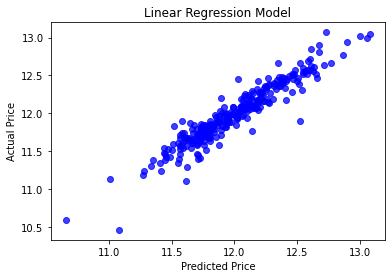

In [75]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

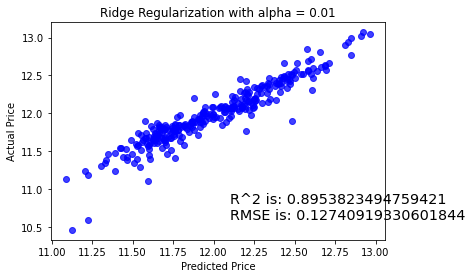

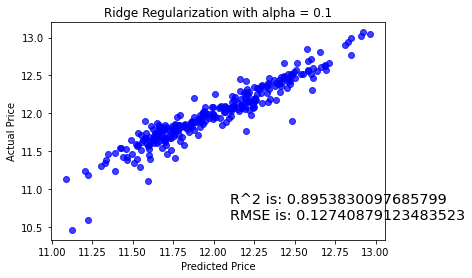

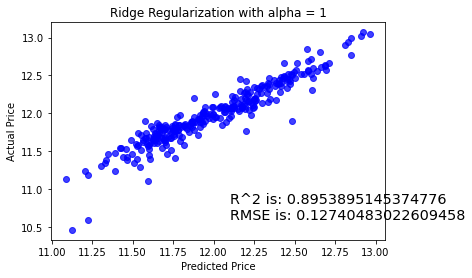

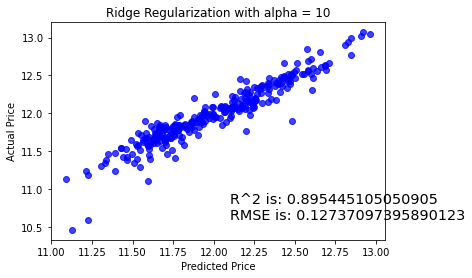

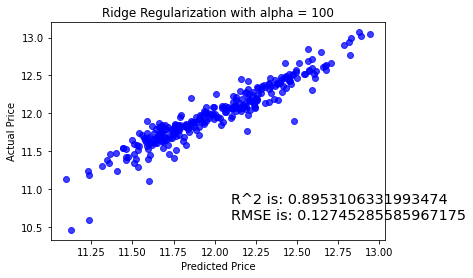

In [76]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(scaled_X_train, y_train)
    preds_ridge = ridge_model.predict(scaled_X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(scaled_X_test, y_test),
                    np.sqrt(mean_squared_error(y_test, preds_ridge)))
    plt.annotate(text=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X_train,y_train):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X_train,y_train)
        return self
    
    def predict(self,X_test):
        w = list()
        pred = np.array([model.predict(X_test) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [78]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

In [79]:
# assign weights based on their gridsearch score
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

In [80]:
weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])

In [81]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=6))
    return rmse

In [82]:
rmse_cv(weight_avg,scaled_X_test,y_test),  rmse_cv(weight_avg,scaled_X_test,y_test).mean()

(array([0.17151044, 0.12738369, 0.1226509 , 0.14110502, 0.17904024,
        0.14802801]),
 0.14828638225212074)

In [83]:
weight_avg = AverageWeight(mod = [ridge,ker,bay],weight=[0.4,0.3,0.3])

In [84]:
rmse_cv(weight_avg,scaled_X_test,y_test),  rmse_cv(weight_avg,scaled_X_test,y_test).mean()

(array([0.17062446, 0.12541553, 0.12342581, 0.14276683, 0.17880969,
        0.14990295]),
 0.14849087876088654)